In [1]:
import keras
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
os.getcwd()

'C:\\Users\\vishu\\FSL folder'

In [3]:
# Load of all the .csv files containing extracted image features
data_USG = pd.read_csv("Features/Ultrasound features.csv")
data_MMG = pd.read_csv("Features/Mammogram features.csv")
data_multimodal = pd.read_csv("Features/multimodal features.csv")

In [4]:
display(data_USG)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F504,F505,F506,F507,F508,F509,F510,F511,F512,Class
0,0.543288,0.179685,0.207682,0.534936,0.219580,0.059561,0.276983,0.000000,0.156189,0.120064,...,0.070909,0.014641,0.314784,0.147423,0.696236,0.136306,0.354444,0.142949,0.367462,B
1,0.299719,0.039686,0.165472,0.513136,0.220379,0.070872,0.063155,0.000422,0.094910,0.326553,...,0.023679,0.103740,0.244714,0.144870,0.750926,0.149139,0.427197,0.079330,0.103739,B
2,0.410166,0.191579,0.116650,0.387906,0.120883,0.120217,0.297104,0.000000,0.136349,0.139023,...,0.138631,0.030944,0.188883,0.162732,0.810708,0.123640,0.310792,0.156947,0.243793,B
3,0.133155,0.237185,0.348671,0.319251,0.319229,0.227353,0.297566,0.017468,0.020823,0.063155,...,0.035276,0.092608,0.247182,0.317141,0.843635,0.094751,0.244842,0.225280,0.154011,B
4,0.523485,0.465996,0.189831,0.277673,0.258885,0.111472,0.340160,0.002219,0.404742,0.116816,...,0.448825,0.009930,0.227319,0.484930,0.601490,0.405880,0.427561,0.146838,0.438305,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.103485,0.189171,0.000772,0.163051,0.012141,0.118606,0.085899,0.282461,0.218878,0.021913,...,0.119027,0.077832,0.165237,0.296884,0.087700,0.018060,0.000000,0.136806,0.303545,M
512,0.445188,0.371587,0.303473,0.090308,0.009418,0.028363,0.000000,0.046075,0.166555,0.232038,...,0.975080,0.076830,0.081998,0.741246,0.169708,0.464461,0.034461,0.590452,0.824470,M
513,0.421531,0.283658,0.153983,0.054143,0.058752,0.143118,0.173772,0.082052,0.228522,0.227152,...,0.794302,0.211057,0.064358,0.331608,0.348843,0.575231,0.110955,0.249393,0.531273,M
514,0.130703,0.002911,0.031517,0.016695,0.006039,0.314526,0.227583,0.318199,0.442571,0.000932,...,0.135148,0.129562,0.405486,0.128523,0.311042,0.033133,0.040146,0.063545,0.468756,M


In [5]:
display(data_MMG)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F504,F505,F506,F507,F508,F509,F510,F511,F512,Class
0,0.078336,0.021067,0.505754,0.112652,0.183497,0.000000,0.336369,0.095968,0.164701,0.323937,...,0.251253,0.523670,0.001734,0.240967,0.408423,0.259788,0.108429,0.103683,0.337500,B
1,0.116409,0.031517,0.399358,0.185276,0.329624,0.014935,0.217565,0.114058,0.221189,0.345708,...,0.176833,0.554716,0.043658,0.190563,0.375375,0.196273,0.053386,0.168645,0.352615,B
2,0.061026,0.013446,0.322420,0.236075,0.188286,0.020793,0.163637,0.012113,0.134559,0.308708,...,0.255937,0.220156,0.009778,0.249396,0.254996,0.131301,0.012238,0.158425,0.407315,B
3,0.216683,0.150488,0.286653,0.252672,0.029974,0.000381,0.217110,0.005557,0.031694,0.352650,...,0.281711,0.304873,0.091279,0.283793,0.295348,0.457995,0.121013,0.209436,0.334454,B
4,0.018892,0.042083,0.304496,0.158007,0.274956,0.005145,0.112114,0.182294,0.184382,0.238603,...,0.174798,0.517012,0.012808,0.493252,0.425035,0.231816,0.054236,0.336956,0.393121,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.085239,0.054079,0.012580,0.089637,0.001838,0.008193,0.195564,0.245573,0.405578,0.064028,...,0.437557,0.000538,0.077294,0.055645,0.092457,0.027774,0.008047,0.465915,0.127756,M
512,0.515273,0.249271,0.111881,0.062604,0.000799,0.014494,0.032930,0.016016,0.055230,0.086184,...,0.495232,0.005035,0.054244,0.674687,0.053259,0.435874,0.002965,0.370616,0.350444,M
513,0.336202,0.138767,0.031832,0.010745,0.026616,0.044349,0.226877,0.254542,0.300293,0.052332,...,0.253605,0.043564,0.245291,0.376864,0.092906,0.314604,0.019928,0.713738,0.353690,M
514,0.028145,0.154854,0.029792,0.013233,0.009380,0.105987,0.231307,0.341524,0.324916,0.012811,...,0.101393,0.015213,0.414361,0.088410,0.033341,0.099460,0.073381,0.638126,0.013405,M


In [6]:
display(data_multimodal)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1016,F1017,F1018,F1019,F1020,F1021,F1022,F1023,F1024,Class
0,0.543288,0.179685,0.207682,0.534936,0.219580,0.059561,0.276983,0.000000,0.156189,0.120064,...,0.251253,0.523670,0.001734,0.240967,0.408423,0.259788,0.108429,0.103683,0.337500,B
1,0.299719,0.039686,0.165472,0.513136,0.220379,0.070872,0.063155,0.000422,0.094910,0.326553,...,0.176833,0.554716,0.043658,0.190563,0.375375,0.196273,0.053386,0.168645,0.352615,B
2,0.410166,0.191579,0.116650,0.387906,0.120883,0.120217,0.297104,0.000000,0.136349,0.139023,...,0.255937,0.220156,0.009778,0.249396,0.254996,0.131301,0.012238,0.158425,0.407315,B
3,0.133155,0.237185,0.348671,0.319251,0.319229,0.227353,0.297566,0.017468,0.020823,0.063155,...,0.281711,0.304873,0.091279,0.283793,0.295348,0.457995,0.121013,0.209436,0.334454,B
4,0.523485,0.465996,0.189831,0.277673,0.258885,0.111472,0.340160,0.002219,0.404742,0.116816,...,0.174798,0.517012,0.012808,0.493252,0.425035,0.231816,0.054236,0.336956,0.393121,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.103485,0.189171,0.000772,0.163051,0.012141,0.118606,0.085899,0.282461,0.218878,0.021913,...,0.437557,0.000538,0.077294,0.055645,0.092457,0.027774,0.008047,0.465915,0.127756,M
512,0.445188,0.371587,0.303473,0.090308,0.009418,0.028363,0.000000,0.046075,0.166555,0.232038,...,0.495232,0.005035,0.054244,0.674687,0.053259,0.435874,0.002965,0.370616,0.350444,M
513,0.421531,0.283658,0.153983,0.054143,0.058752,0.143118,0.173772,0.082052,0.228522,0.227152,...,0.253605,0.043564,0.245291,0.376864,0.092906,0.314604,0.019928,0.713738,0.353690,M
514,0.130703,0.002911,0.031517,0.016695,0.006039,0.314526,0.227583,0.318199,0.442571,0.000932,...,0.101393,0.015213,0.414361,0.088410,0.033341,0.099460,0.073381,0.638126,0.013405,M


In [7]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,2,3,4"
device = os.environ["CUDA_VISIBLE_DEVICES"]

In [8]:
class_mapping = {
    'B': 0,
    'M': 1,
}
num_classes = 2

label_encoder = LabelEncoder()
data_USG['Class'] = label_encoder.fit_transform(data_USG['Class'])
data_MMG['Class'] = label_encoder.fit_transform(data_MMG['Class'])
data_multimodal['Class'] = label_encoder.fit_transform(data_multimodal['Class'])

In [9]:
# pretraining a neural network
X_pretrain =  data_USG.drop(columns=['Class']).values

# Define an autoencoder architecture
input_layer = Input(shape=(512,))
autoencoder_input = Input(shape=(512,))  # Adjust input_shape as needed
autoencoder_hidden_1 = Dense(256, activation='relu')(autoencoder_input)
autoencoder_hidden_2 = Dense(128, activation='relu')(autoencoder_hidden_1)
autoencoder_output = Dense(512, activation='sigmoid')(autoencoder_hidden_2)

autoencoder_model_USG = Model(autoencoder_input, autoencoder_output)

# Compile the autoencoder (minimize reconstruction error)
autoencoder_model_USG.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder_model_USG.fit(X_pretrain, X_pretrain, epochs=50, batch_size=32)

# Save the pre-trained weights
autoencoder_model_USG.save_weights('Weights/pretrained_weights_USG.h5')

Epoch 1/50
17/17 [==============================] - 11s 94ms/step - loss: 0.6039
Epoch 2/50
17/17 [==============================] - 1s 44ms/step - loss: 0.5010
Epoch 3/50
17/17 [==============================] - 1s 44ms/step - loss: 0.4837
Epoch 4/50
17/17 [==============================] - 1s 32ms/step - loss: 0.4726
Epoch 5/50
17/17 [==============================] - 1s 40ms/step - loss: 0.4642
Epoch 6/50
17/17 [==============================] - 1s 30ms/step - loss: 0.4579
Epoch 7/50
17/17 [==============================] - 1s 31ms/step - loss: 0.4525
Epoch 8/50
17/17 [==============================] - 1s 63ms/step - loss: 0.4480
Epoch 9/50
17/17 [==============================] - 1s 43ms/step - loss: 0.4446
Epoch 10/50
17/17 [==============================] - 1s 70ms/step - loss: 0.4414
Epoch 11/50
17/17 [==============================] - 1s 55ms/step - loss: 0.4386
Epoch 12/50
17/17 [==============================] - 1s 60ms/step - loss: 0.4359
Epoch 13/50
17/17 [=================

In [10]:
# Load your data  'data_USG'
# X should contain your features, and 'Class' should contain binary labels (0 or 1)
X = data_USG.drop(columns=['Class']).values
y = data_USG['Class'].values.reshape(-1, 1)

# data split
X_train_USG, X_test_USG, y_train_USG, y_test_USG = train_test_split(X, y, test_size=0.2, random_state=42)

# Model defintion.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(512,)))  # Adjust input_shape as needed
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Loading the pretrained weights
# Copy weights from autoencoder to the corresponding layers in the new model
model.layers[0].set_weights(autoencoder_model_USG.layers[1].get_weights())  # Copy weights for the first dense layer
model.layers[1].set_weights(autoencoder_model_USG.layers[2].get_weights())  # Copy weights for the second dense layer


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train_USG, y_train_USG, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_USG, y_test_USG)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
11/11 [==============================] - 12s 330ms/step - loss: 0.6602 - accuracy: 0.6596 - val_loss: 0.5414 - val_accuracy: 0.7349
Epoch 2/10
11/11 [==============================] - 1s 55ms/step - loss: 0.3875 - accuracy: 0.8085 - val_loss: 0.3855 - val_accuracy: 0.7952
Epoch 3/10
11/11 [==============================] - 1s 62ms/step - loss: 0.2959 - accuracy: 0.8723 - val_loss: 0.3449 - val_accuracy: 0.8072
Epoch 4/10
11/11 [==============================] - 1s 65ms/step - loss: 0.2238 - accuracy: 0.9088 - val_loss: 0.3417 - val_accuracy: 0.8313
Epoch 5/10
11/11 [==============================] - 1s 54ms/step - loss: 0.1826 - accuracy: 0.9453 - val_loss: 0.2667 - val_accuracy: 0.8675
Epoch 6/10
11/11 [==============================] - 1s 74ms/step - loss: 0.1447 - accuracy: 0.9635 - val_loss: 0.2358 - val_accuracy: 0.9157
Epoch 7/10
11/11 [==============================] - 1s 70ms/step - loss: 0.1209 - accuracy: 0.9726 - val_loss: 0.2149 - val_accuracy: 0.9036
Epoch 8/10


4/4 [==============================] - 1s 15ms/step
Confusion Matrix:


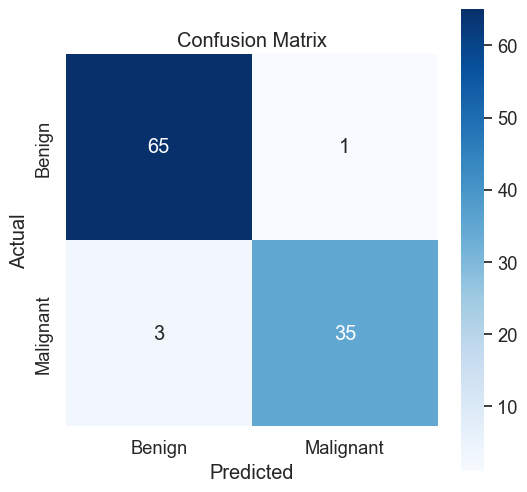

In [11]:
# Predict the labels for the test data
y_pred_USG = model.predict(X_test_USG)
y_pred_classes = np.round(y_pred_USG)  # Convert probabilities to binary predictions (0 or 1)

# Create the confusion matrix
confusion = confusion_matrix(y_test_USG, y_pred_classes)

print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# pretraining a neural network
X_pretrain =  data_MMG.drop(columns=['Class']).values

# Define an autoencoder architecture
input_layer = Input(shape=(512,))
autoencoder_input = Input(shape=(512,))  # Adjust input_shape as needed
autoencoder_hidden_1 = Dense(256, activation='relu')(autoencoder_input)
autoencoder_hidden_2 = Dense(128, activation='relu')(autoencoder_hidden_1)
autoencoder_output = Dense(512, activation='sigmoid')(autoencoder_hidden_2)

autoencoder_model_MMG = Model(autoencoder_input, autoencoder_output)

# Compile the autoencoder (minimize reconstruction error)
autoencoder_model_MMG.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder_model_MMG.fit(X_pretrain, X_pretrain, epochs=50, batch_size=32)

# Save the pre-trained weights
autoencoder_model_MMG.save_weights('Weights/pretrained_weights_MMG.h5')

Epoch 1/50
17/17 [==============================] - 6s 29ms/step - loss: 0.6122
Epoch 2/50
17/17 [==============================] - 1s 32ms/step - loss: 0.5141
Epoch 3/50
17/17 [==============================] - 0s 27ms/step - loss: 0.4952
Epoch 4/50
17/17 [==============================] - 0s 28ms/step - loss: 0.4855
Epoch 5/50
17/17 [==============================] - 0s 27ms/step - loss: 0.4768
Epoch 6/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4703
Epoch 7/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4651
Epoch 8/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4610
Epoch 9/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4575
Epoch 10/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4542
Epoch 11/50
17/17 [==============================] - 0s 26ms/step - loss: 0.4509
Epoch 12/50
17/17 [==============================] - 0s 27ms/step - loss: 0.4481
Epoch 13/50
17/17 [==================

In [13]:
# Load your data  'data_MMG'
# X should contain your features, and 'Class' should contain binary labels (0 or 1)
X = data_MMG.drop(columns=['Class']).values
y = data_MMG['Class'].values.reshape(-1, 1)

# Split your data into training and testing sets
X_train_MMG, X_test_MMG, y_train_MMG, y_test_MMG = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(512,)))  # Adjust input_shape as needed
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Loading the pretrained weights
# Copy weights from autoencoder to the corresponding layers in the new model
model.layers[0].set_weights(autoencoder_model_MMG.layers[1].get_weights())  # Copy weights for the first dense layer
model.layers[1].set_weights(autoencoder_model_MMG.layers[2].get_weights())  # Copy weights for the second dense layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train_MMG, y_train_MMG, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_MMG, y_test_MMG)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
11/11 [==============================] - 12s 373ms/step - loss: 0.9807 - accuracy: 0.5198 - val_loss: 0.8076 - val_accuracy: 0.5783
Epoch 2/10
11/11 [==============================] - 1s 123ms/step - loss: 0.6355 - accuracy: 0.6626 - val_loss: 0.5806 - val_accuracy: 0.6627
Epoch 3/10
11/11 [==============================] - 1s 80ms/step - loss: 0.4433 - accuracy: 0.8085 - val_loss: 0.4279 - val_accuracy: 0.8313
Epoch 4/10
11/11 [==============================] - 1s 72ms/step - loss: 0.3374 - accuracy: 0.8602 - val_loss: 0.3348 - val_accuracy: 0.8916
Epoch 5/10
11/11 [==============================] - 1s 73ms/step - loss: 0.2604 - accuracy: 0.9119 - val_loss: 0.2676 - val_accuracy: 0.9639
Epoch 6/10
11/11 [==============================] - 1s 55ms/step - loss: 0.2074 - accuracy: 0.9483 - val_loss: 0.2454 - val_accuracy: 0.9398
Epoch 7/10
11/11 [==============================] - 1s 55ms/step - loss: 0.1723 - accuracy: 0.9605 - val_loss: 0.1955 - val_accuracy: 0.9518
Epoch 8/10

4/4 [==============================] - 1s 16ms/step
Confusion Matrix:


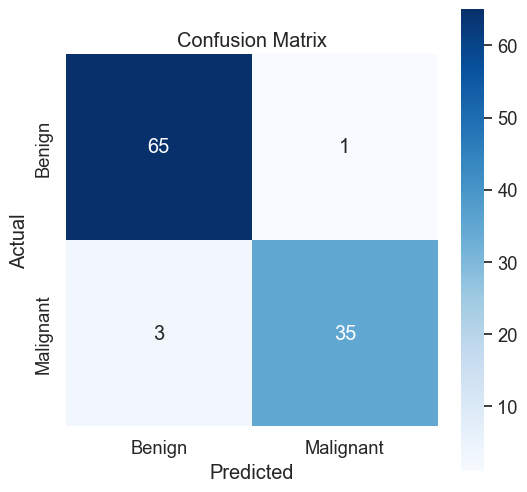

In [14]:
# Predict the labels for the test data
y_pred_MMG = model.predict(X_test_MMG)
y_pred_classes = np.round(y_pred_MMG)  # Convert probabilities to binary predictions (0 or 1)

# Create the confusion matrix
confusion = confusion_matrix(y_test_MMG, y_pred_classes)

print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# pretraining a neural network
X_pretrain =  data_multimodal.drop(columns=['Class']).values

# Define an autoencoder architecture
autoencoder_input = Input(shape=(1024,))  # Adjust input_shape as needed
autoencoder_hidden_1 = Dense(256, activation='relu')(autoencoder_input)
autoencoder_hidden_2 = Dense(128, activation='relu')(autoencoder_hidden_1)
autoencoder_output = Dense(1024, activation='sigmoid')(autoencoder_hidden_2)

autoencoder_model = Model(autoencoder_input, autoencoder_output)

# Compile the autoencoder (minimize reconstruction error)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder_model.fit(X_pretrain, X_pretrain, epochs=50, batch_size=32)

# Save the pre-trained weights
autoencoder_model.save_weights('Weights/pretrained_weights_multimodal.h5')

Epoch 1/50
17/17 [==============================] - 9s 77ms/step - loss: 0.5924
Epoch 2/50
17/17 [==============================] - 1s 73ms/step - loss: 0.5003
Epoch 3/50
17/17 [==============================] - 1s 80ms/step - loss: 0.4906
Epoch 4/50
17/17 [==============================] - 2s 91ms/step - loss: 0.4835
Epoch 5/50
17/17 [==============================] - 1s 60ms/step - loss: 0.4754
Epoch 6/50
17/17 [==============================] - 1s 66ms/step - loss: 0.4703
Epoch 7/50
17/17 [==============================] - 1s 69ms/step - loss: 0.4664
Epoch 8/50
17/17 [==============================] - 1s 59ms/step - loss: 0.4628
Epoch 9/50
17/17 [==============================] - 1s 48ms/step - loss: 0.4590
Epoch 10/50
17/17 [==============================] - 1s 48ms/step - loss: 0.4548
Epoch 11/50
17/17 [==============================] - 1s 52ms/step - loss: 0.4509
Epoch 12/50
17/17 [==============================] - 1s 60ms/step - loss: 0.4479
Epoch 13/50
17/17 [==================

In [18]:
# Load your data  'data_multimodal'
# X should contain your features, and 'Class' should contain binary labels (0 or 1)
X = data_multimodal.drop(columns=['Class']).values
y = data_multimodal['Class'].values.reshape(-1, 1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(1024,)))  # Adjust input_shape as needed
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

# Loading the pretrained weights
# Copy weights from autoencoder to the corresponding layers in the new model
model.layers[0].set_weights(autoencoder_model.layers[1].get_weights())  # Copy weights for the first dense layer
model.layers[1].set_weights(autoencoder_model.layers[2].get_weights())  # Copy weights for the second dense layer


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
9/9 [==============================] - 12s 412ms/step - loss: 1.2947 - accuracy: 0.5108 - val_loss: 0.6564 - val_accuracy: 0.6452
Epoch 2/10
9/9 [==============================] - 1s 78ms/step - loss: 0.5191 - accuracy: 0.7302 - val_loss: 0.4249 - val_accuracy: 0.8387
Epoch 3/10
9/9 [==============================] - 1s 96ms/step - loss: 0.3246 - accuracy: 0.8957 - val_loss: 0.3379 - val_accuracy: 0.9032
Epoch 4/10
9/9 [==============================] - 1s 95ms/step - loss: 0.2154 - accuracy: 0.9532 - val_loss: 0.2861 - val_accuracy: 0.8710
Epoch 5/10
9/9 [==============================] - 1s 77ms/step - loss: 0.1466 - accuracy: 0.9748 - val_loss: 0.2306 - val_accuracy: 0.8710
Epoch 6/10
9/9 [==============================] - 1s 80ms/step - loss: 0.1104 - accuracy: 0.9820 - val_loss: 0.1577 - val_accuracy: 0.9355
Epoch 7/10
9/9 [==============================] - 1s 116ms/step - loss: 0.0894 - accuracy: 0.9928 - val_loss: 0.1267 - val_accuracy: 0.9677
Epoch 8/10
9/9 [========

7/7 [==============================] - 1s 31ms/step
Confusion Matrix:


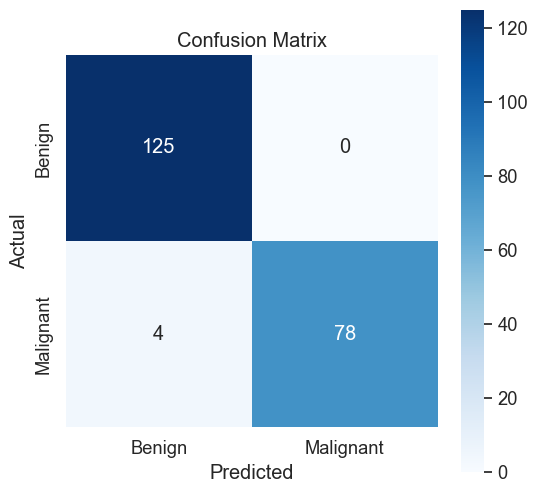

In [19]:
# Predict the labels for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)  # Convert probabilities to binary predictions (0 or 1)

# Create the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", square=True,
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()